<h1 align="center">Projet NET4103: Réseaux complexes</h1>
<h2 align="center">Louise Schnee</h2>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from packaging import version
import sys

plt.rcParams['figure.figsize'] = [15, 8]

print("Python version:", sys.version)
print("networkx version:", nx.__version__)

# assert networkx version is greater or equal to 2.6
assert version.parse(nx.__version__) >= version.parse("2.6")

# assert python version is greater that 3.7
assert sys.version_info[0] == 3
assert sys.version_info[1] >= 7 

Python version: 3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]
networkx version: 3.0


<h3 align="center">Question 2: Social Network Analysis with the Facebook100 dataset</h3>

<h3>(a)</h3>

In [2]:
G1 = nx.read_gml("fb100/data/Caltech36.gml")
G1.name = "Caltech"
G2 = nx.read_gml("fb100/data/MIT8.gml")
G2.name = "MIT"
G3 = nx.read_gml("fb100/data/Johns Hopkins55.gml")
G3.name = "Johns Hopkins"

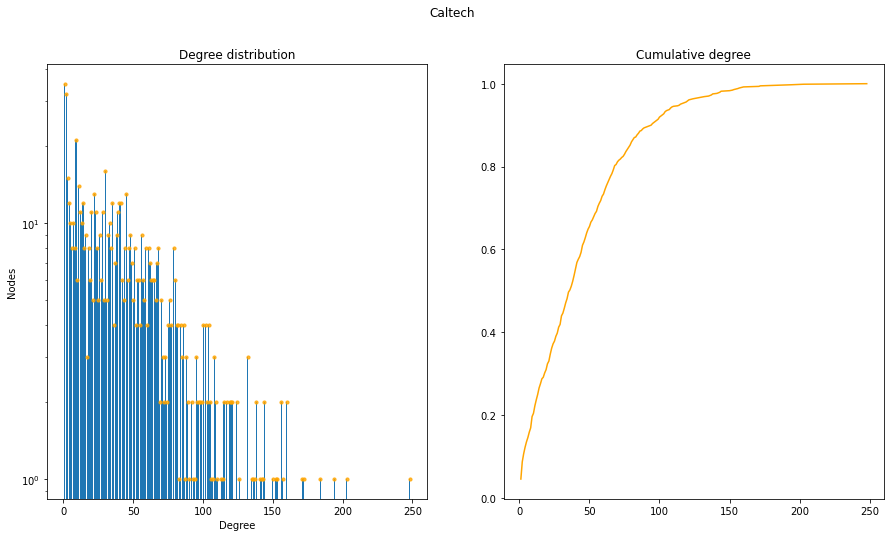

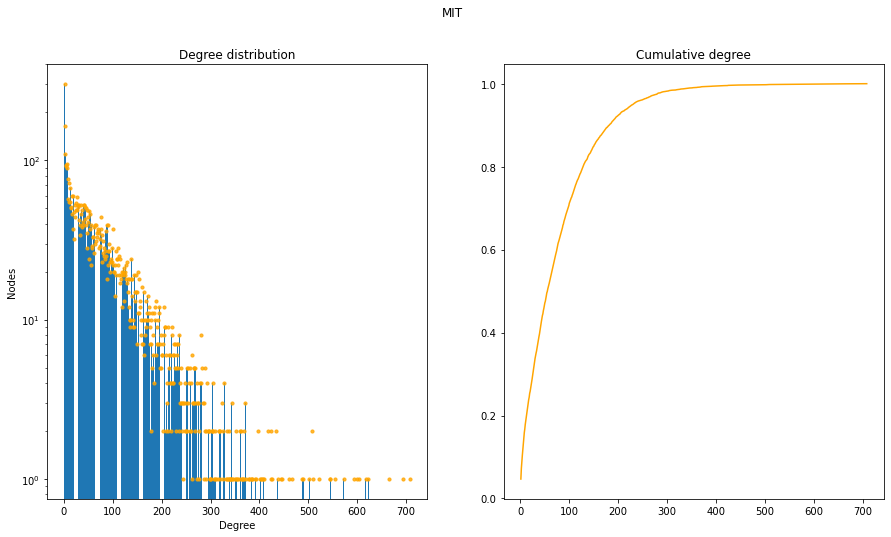

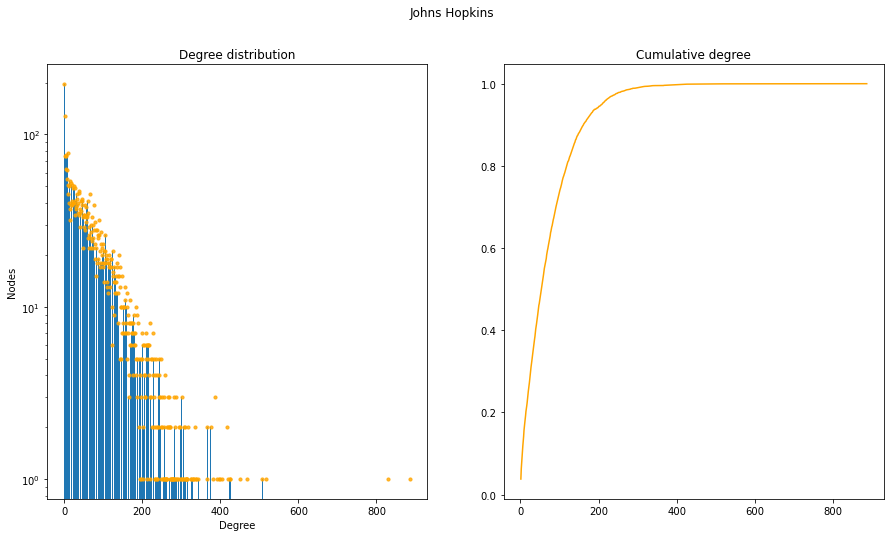

In [3]:
def degree_distribution(G):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(G.name)
    ax1.set_title("Degree distribution")
    ax2.set_title("Cumulative degree")
    ax1.set_xlabel("Degree")
    ax1.set_ylabel("Nodes")
    ax1.set_yscale('log')

    D = sorted([d for n, d in G.degree()], reverse=True)
    degrees, counts = np.unique(D, return_counts=True)
    ax1.bar(degrees, counts)
    ax1.scatter(degrees, counts, marker='o', s=10, c='orange', alpha=0.8)
    ax2.plot(degrees, np.cumsum(counts)/np.sum(counts), c="orange")



degree_distribution(G1)
degree_distribution(G2)
degree_distribution(G3)

The degree distribution shows that many people have between 0 and 200 friends on Facebook100. There are only a few number of people with more than 300 friends.

<h3>(b)</h3>

In [34]:
def global_clustering_coeff(G):
    return nx.algorithms.cluster.transitivity(G)

def mean_local_clustering_coeff(G):
    return nx.algorithms.cluster.average_clustering(G)

def edge_density(G):
    return nx.density(G)


for G in [G1, G2, G3]:
    print("-"*20, G.name, "-"*20)
    print("Global clustering coefficient:     ", global_clustering_coeff(G))
    print("Mean local clustering coefficient: ", mean_local_clustering_coeff(G))
    print("Edge density:                      ", edge_density(G))

-------------------- Caltech --------------------
Global clustering coefficient:      0.2912826901150874
Mean local clustering coefficient:  0.40929439048517247
Edge density:                       0.05640442132639792
-------------------- MIT --------------------
Global clustering coefficient:      0.18028845093502427
Mean local clustering coefficient:  0.2712187419501315
Edge density:                       0.012118119495041378
-------------------- Johns Hopkins --------------------
Global clustering coefficient:      0.19316123901594015
Mean local clustering coefficient:  0.26839307371293525
Edge density:                       0.013910200162372396


These 3 networks are sparse.

<h3>(c)</h3>

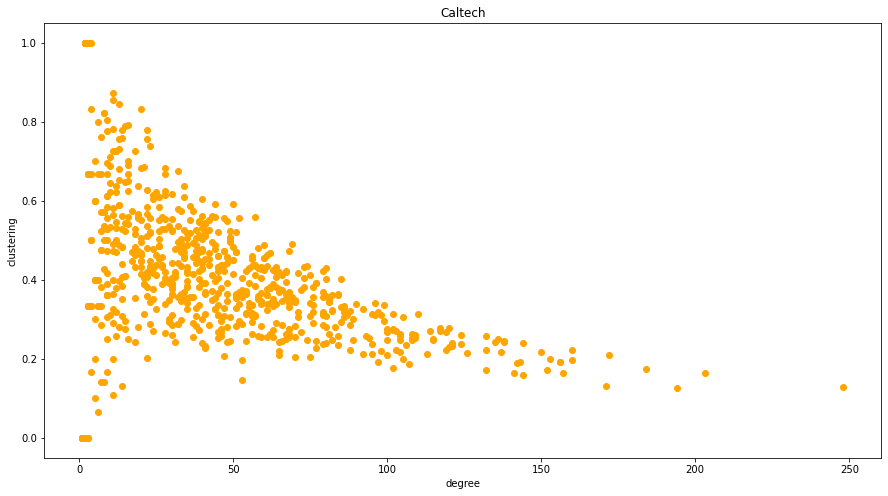

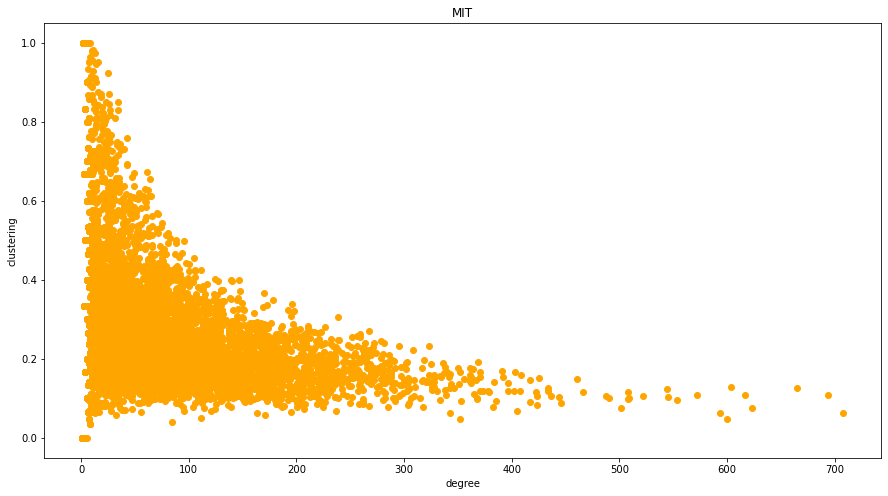

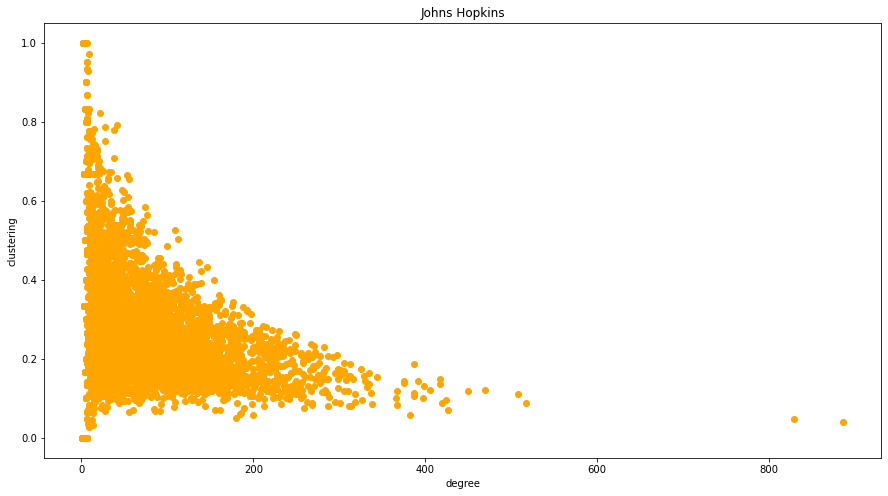

In [5]:
def degree_vs_local_clustering_coeff(G):
    plt.figure()
    plt.title(G.name)
    degrees = D = np.array([d for n, d in G.degree()])
    clusters = np.array(list(nx.algorithms.cluster.clustering(G).values()))
    plt.xlabel("degree")
    plt.ylabel("clustering")
    plt.scatter(degrees, clusters, c='orange')

degree_vs_local_clustering_coeff(G1)
degree_vs_local_clustering_coeff(G2)
degree_vs_local_clustering_coeff(G3)

We can observe that for all three networks, when the degree gets higher, the clustering is low. This shows that the users of the networks have a lot of connexions, but they don't belong to a large global community.

<h3 align="center">Question 3: Assortativity Analysis with the Facebook100 Dataset</h3>

<h3>(a)</h3>

USC35.gml
Princeton12.gml
Colgate88.gml
Simmons81.gml
Cal65.gml
Mississippi66.gml
Santa74.gml
Maine59.gml
Oklahoma97.gml
UF21.gml
Bucknell39.gml
Brown11.gml
Tennessee95.gml
NYU9.gml
Rice31.gml


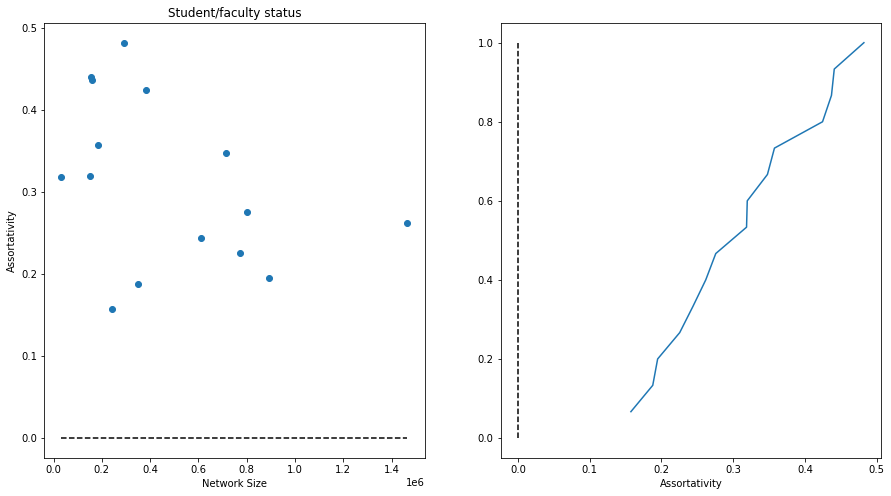

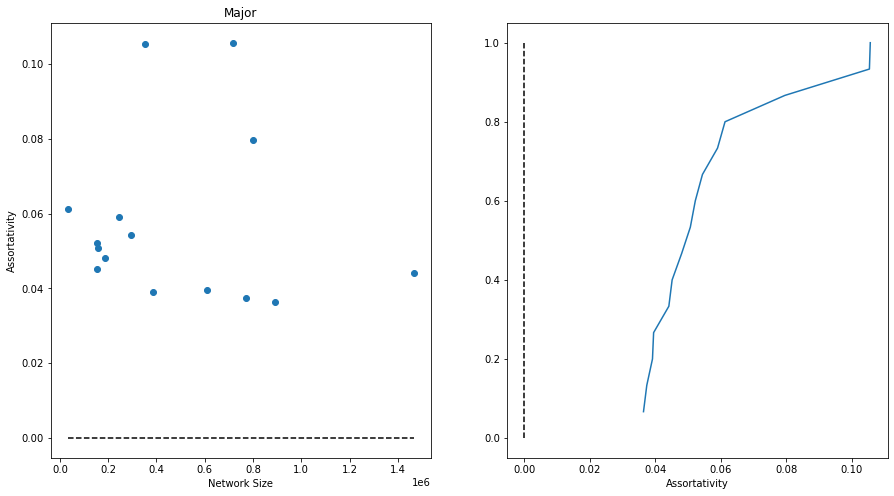

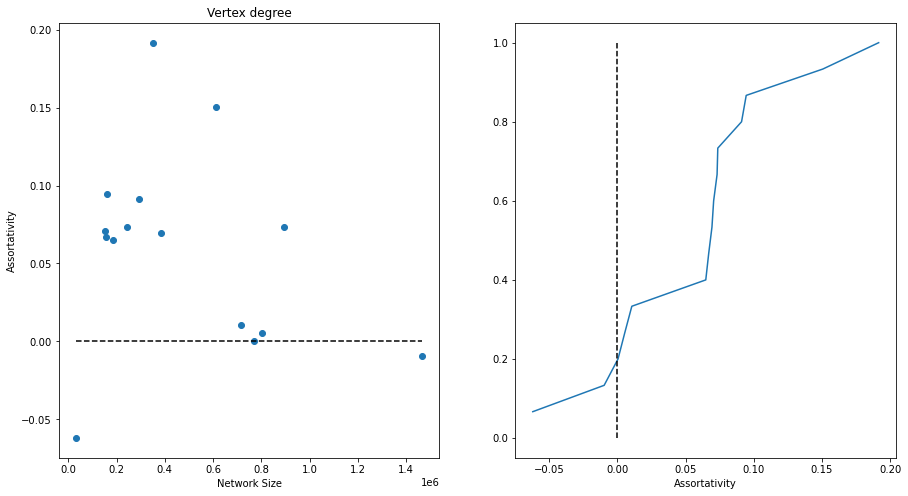

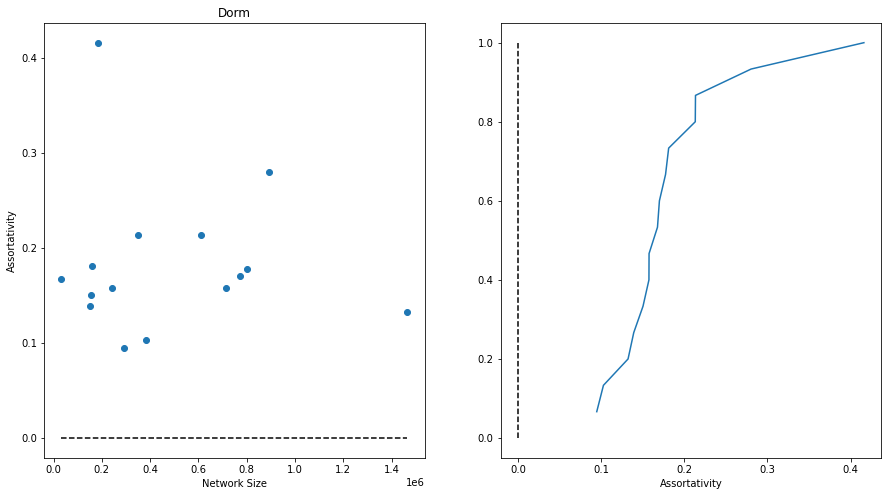

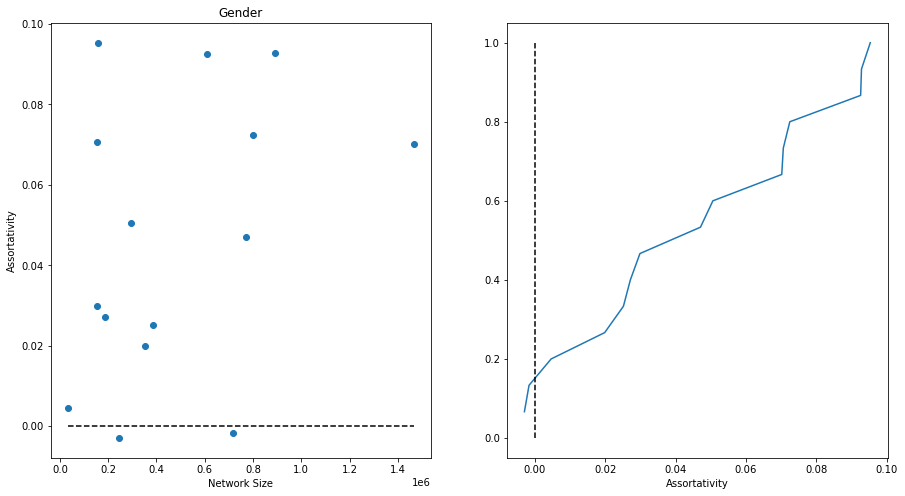

In [6]:
from os import listdir

def assortativity(G):
    return (nx.assortativity.attribute_assortativity_coefficient(G, "student_fac"),
        nx.assortativity.attribute_assortativity_coefficient(G, "major_index"),
        nx.assortativity.degree_assortativity_coefficient(G),
        nx.assortativity.attribute_assortativity_coefficient(G, "dorm"),
        nx.assortativity.attribute_assortativity_coefficient(G, "gender"))

def plot_assortativity(sizes, assor, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title(title)
    ax1.set_xlabel("Network Size")
    ax1.set_ylabel("Assortativity")
    ax2.set_xlabel("Assortativity")
    ax1.scatter(sizes, assor)
    ax1.plot([min(sizes), max(sizes)], [0, 0], color="black", linestyle="dashed")
    a, counts = np.unique(assor, return_counts=True)
    c_sum = np.cumsum(counts)/np.sum(counts)
    ax2.plot(a, c_sum)
    ax2.plot([0, 0], [0, np.max(c_sum)], color="black", linestyle="dashed")

sizes = []
list_assortativities = [[], [], [], [], []]
list_files = listdir("fb100/data")
for filename in list_files[0:15]:
    print(filename)
    graph = nx.read_gml(f"fb100/data/{filename}")
    graph: nx.Graph = graph
    sizes.append(graph.size())
    for i, a in enumerate(assortativity(graph)):
        list_assortativities[i].append(a)

plot_assortativity(sizes, list_assortativities[0], "Student/faculty status")
plot_assortativity(sizes, list_assortativities[1], "Major")
plot_assortativity(sizes, list_assortativities[2], "Vertex degree")
plot_assortativity(sizes, list_assortativities[3], "Dorm")
plot_assortativity(sizes, list_assortativities[4], "Gender")

I examined the data of 15 graphs. Although I couldn’t examine all of them (the code was very long to execute), we can observe a certain tendency thanks to the results.
It seems that people who share the same characteristics are easily connected to each other.

<h3 align="center">Question 4: Link prediction</h3>

<h3>(b)</h3>

In [7]:
from abc import ABC
from abc import abstractmethod

class LinkPrediction ( ABC ) :
    def __init__ ( self , graph: nx.Graph ) :
        self.graph: nx.Graph = graph
        self.N = len(graph)
    def neighbors ( self , v ) :
        neighbors_list = self.graph.neighbors(v)
        return set(neighbors_list)

    @abstractmethod
    def fit (self) :
        raise NotImplementedError (" Fit must be implemented ")

Common neighbors

In [8]:
class CommonNeighbors(LinkPrediction):
    def __init__(self, graph: nx.Graph):
        super().__init__(graph.copy())

    def fit(self):
        res = []
        for u in self.graph.nodes:
            for v in self.graph.nodes:
                if u != v:
                    n_u = self.neighbors(u)
                    n_v = self.neighbors(v)
                    p = len(n_u.intersection(n_v))
                    res.append((u, v, p))
        return res

Jaccard

In [9]:
class Jaccard(LinkPrediction):
    def __init__(self, graph: nx.Graph):
        super().__init__(graph.copy())
    
    def fit(self):
        res = []
        for u in self.graph.nodes:
            for v in self.graph.nodes:
                if u != v:
                    n_u = self.neighbors(u)
                    n_v = self.neighbors(v)
                    l_union = len(n_u.union(n_v))
                    p = 0
                    if l_union != 0:
                        p = len(n_u.intersection(n_v)) / l_union
                    res.append((u, v, p))
        return res

Admic/Adar

In [10]:
class AdamicAdar(LinkPrediction):
    def __init__(self, graph: nx.Graph):
        super().__init__(graph.copy())

    def fit(self):
        res = []
        for u in self.graph.nodes:
            for v in self.graph.nodes:
                if u != v:
                    n_u = self.neighbors(u)
                    n_v = self.neighbors(v)
                    p = 0
                    for z in n_u.intersection(n_v):
                        p += 1 / np.log(len(self.neighbors(z)))
                    res.append((u, v, p))
        return res

<h3>(c)</h3>

In [18]:
# 2. Randomly remove edges
def remove_edges(G: nx.Graph, f=0.05):
    E = np.array(G.edges)
    index_to_remove = np.random.choice(len(E), int(len(E) * f))
    E_removed = E[index_to_remove]
    G.remove_edges_from(E_removed)
    return set(e for e in G.edges)

# 3. Predicted "friendship" of each node pair
def predicted_friendship(L: LinkPrediction):
    E_predict = []
    for u, v, p in L.fit():
        E_predict.append(((u, v), p))
    return E_predict

# 4. Sort and keep the first k pairs of nodes
def confidence_sorting(E):
    E_sorted = sorted(E, key=lambda e: e[1], reverse = True)
    E_sorted = [E_sorted[i][0] for i in range(len(E_sorted))]
    return E_sorted

# 5. Intersection between E_removed and E_predict
def top_k(L: LinkPrediction, k):
    E_removed = remove_edges(L.graph)
    E_predict = confidence_sorting(predicted_friendship(L))
    E_predict = E_predict[:k]
    return len(E_removed.intersection(E_predict))


def precision_k(L: LinkPrediction, k):
    return top_k(L, k) / k


<h3>(d)</h3>

In [29]:
G4 = nx.read_gml("fb100/data/Reed98.gml")
G4.name = "Reed"
G5 = nx.read_gml("fb100/data/Simmons81.gml")
G5.name = "Simmons"

L1_cn = CommonNeighbors(G1)
L4_cn = CommonNeighbors(G4)
L5_cn = CommonNeighbors(G5)

L1_j = Jaccard(G1)
L4_j = Jaccard(G4)
L5_j = Jaccard(G5)

L1_aa = AdamicAdar(G1)
L4_aa = AdamicAdar(G4)
L5_aa = AdamicAdar(G5)

for k in [50, 100, 200, 400]:
    print("--------------- k =", k, "---------------")
    print("     Common Neighbors:")
    print(f"{G1.name:10}top", k, "=", top_k(L1_cn, k), "; precision =", precision_k(L1_cn, k))
    print(f"{G4.name:10}top", k, "=", top_k(L4_cn, k), "; precision =", precision_k(L4_cn, k))
    print(f"{G5.name:10}top", k, "=", top_k(L5_cn, k), "; precision =", precision_k(L5_cn, k))
    print("     Jaccard:")
    print(f"{G1.name:10}top", k, "=", top_k(L1_j, k), "; precision =", precision_k(L1_j, k))
    print(f"{G4.name:10}top", k, "=", top_k(L4_j, k), "; precision =", precision_k(L4_j, k))
    print(f"{G5.name:10}top", k, "=", top_k(L5_j, k), "; precision =", precision_k(L5_j, k))
    print("     Admic Adar:")
    print(f"{G1.name:10}top", k, "=", top_k(L1_aa, k), "; precision =", precision_k(L1_aa, k))
    print(f"{G4.name:10}top", k, "=", top_k(L4_aa, k), "; precision =", precision_k(L4_aa, k))
    print(f"{G5.name:10}top", k, "=", top_k(L5_aa, k), "; precision =", precision_k(L5_aa, k))
    print("\n")


--------------- k = 50 ---------------
     Common Neighbors:
Caltech   top 50 = 23 ; precision = 0.48
Reed      top 50 = 22 ; precision = 0.46
Simmons   top 50 = 22 ; precision = 0.42
     Jaccard:
Caltech   top 50 = 22 ; precision = 0.36
Reed      top 50 = 11 ; precision = 0.1
Simmons   top 50 = 18 ; precision = 0.24
     Admic Adar:
Caltech   top 50 = 24 ; precision = 0.48
Reed      top 50 = 22 ; precision = 0.42
Simmons   top 50 = 24 ; precision = 0.46


--------------- k = 100 ---------------
     Common Neighbors:
Caltech   top 100 = 43 ; precision = 0.43
Reed      top 100 = 42 ; precision = 0.4
Simmons   top 100 = 42 ; precision = 0.4
     Jaccard:
Caltech   top 100 = 28 ; precision = 0.26
Reed      top 100 = 22 ; precision = 0.22
Simmons   top 100 = 19 ; precision = 0.14
     Admic Adar:
Caltech   top 100 = 43 ; precision = 0.41
Reed      top 100 = 35 ; precision = 0.35
Simmons   top 100 = 43 ; precision = 0.4


--------------- k = 200 ---------------
     Common Neighbors:
Cal

All 3 metrics have a very low precision, less than 0.5. 
If we compare them to each other, the metrics common neighbors and admic adar seem to be pretty efficient for a small portion of edges (very slightly more precise for the common neighbor metric).
But we can notice that the precision decreases when we evaluate them on a larger portion of edges.
The metric jaccard is much less efficient, but it seems that the precision stays the same regardless of the size of the edge set evaluated. It might then be more efficient for a very large portion of edges.